In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn.impute import SimpleImputer



In [6]:
# URL of the CSV file
#url = 'C:\Users\himan\OneDrive\Documents\RedbackOperations\redback-fit-sports-performance\Cycling Analysis\data\activities_cleaned.csv'
# Read the CSV file directly from the URL
df = pd.read_csv('C:/Users/himan/OneDrive/Documents/RedbackOperations/redback-fit-sports-performance/Cycling Analysis/data/activities_cleaned.csv')

# Display the first 10 rows
df.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Perceived Relative Effort,Commute.1,From Upload,Grade Adjusted Distance,Bike,Gear,Flagged,Average Elapsed Speed,Dirt Distance,Total Steps
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Isolate the running data component
df_run = df[df['Activity Type'] == 'Run']

df_run.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Perceived Relative Effort,Commute.1,From Upload,Grade Adjusted Distance,Bike,Gear,Flagged,Average Elapsed Speed,Dirt Distance,Total Steps
89,7057073739,"28 Apr 2022, 21:49:44",Morning Run,Run,4127,12.77,178.0,78.0,False,NaN,...,NaN,0.0,1.0,12887.299805,NaN,5557176.0,0.0,3.095551,0.000000,NaN
90,7067754767,"1 May 2022, 00:11:03",Morning Run,Run,7723,24.63,173.0,185.0,False,NaN,...,NaN,0.0,1.0,24888.000000,NaN,5557176.0,0.0,3.189298,0.000000,NaN
91,7073448977,"1 May 2022, 23:04:26",Morning Run,Run,4202,12.51,182.0,255.0,False,NaN,...,NaN,0.0,1.0,12599.500000,NaN,5557176.0,0.0,2.977218,179.100006,NaN
92,7083686840,"3 May 2022, 20:34:15",Morning Run,Run,4086,12.72,188.0,276.0,False,NaN,...,NaN,0.0,1.0,12884.000000,NaN,5557176.0,0.0,3.114334,182.600006,NaN
93,7094718079,"5 May 2022, 21:44:27",Morning Run,Run,4290,13.09,184.0,241.0,False,NaN,...,NaN,0.0,1.0,13331.599609,NaN,5557176.0,0.0,3.052823,11378.900391,NaN


In [8]:
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                164 non-null    int64  
 1   Activity Date              164 non-null    object 
 2   Activity Name              164 non-null    object 
 3   Activity Type              164 non-null    object 
 4   Elapsed Time               164 non-null    int64  
 5   Distance                   164 non-null    float64
 6   Max Heart Rate             164 non-null    float64
 7   Relative Effort            164 non-null    float64
 8   Commute                    164 non-null    bool   
 9   Activity Gear              0 non-null      object 
 10  Filename                   164 non-null    object 
 11  Athlete Weight             0 non-null      float64
 12  Bike Weight                0 non-null      float64
 13  Elapsed Time.1             164 non-null    float64
 14

In [9]:
# Sum the total rows of missing values from each attribute
missing_values = df_run.isnull().sum()

# Return only attrbutes with missing values
missing_values[missing_values > 0]

Activity Gear                164
Athlete Weight               164
Bike Weight                  164
Elevation Loss                 1
Elevation Low                  1
Elevation High                 1
Max Heart Rate.1             164
Average Temperature          155
Total Work                   147
Perceived Exertion           164
Prefer Perceived Exertion    164
Perceived Relative Effort    164
Grade Adjusted Distance        1
Bike                         164
Total Steps                  156
dtype: int64

In [10]:
# Remove attributes where 50% or more data is missing
null_threshold = len(df_run) * 0.5
df_run_clean = df_run.dropna(thresh=null_threshold, axis=1)

c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

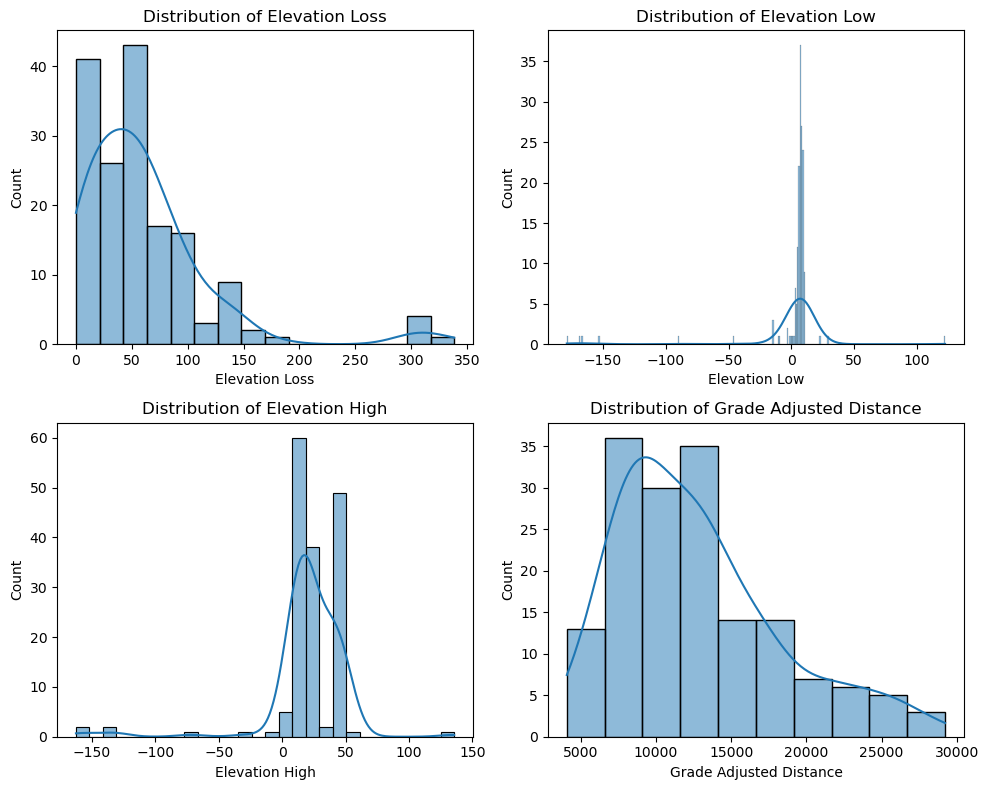

In [11]:
# Columns containing missing val less than 50% of attribute
missing_val_cols = df_run_clean.columns[(df_run_clean.isnull().mean() > 0) & (df_run_clean.isnull().mean() < 0.5)].tolist()

# Plot distributions of attributes less than 50%
plt.figure(figsize=(10,8))

for i, col in enumerate(missing_val_cols, 1):
    plt.subplot(2, 2, i)
    # Drop na for the purposes of the distribution analysis
    sns.histplot(df_run_clean[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [12]:
imputer = SimpleImputer(strategy='median')
df_run_clean[missing_val_cols] = imputer.fit_transform(df_run_clean[missing_val_cols])

df_run_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Activity ID              164 non-null    int64  
 1   Activity Date            164 non-null    object 
 2   Activity Name            164 non-null    object 
 3   Activity Type            164 non-null    object 
 4   Elapsed Time             164 non-null    int64  
 5   Distance                 164 non-null    float64
 6   Max Heart Rate           164 non-null    float64
 7   Relative Effort          164 non-null    float64
 8   Commute                  164 non-null    bool   
 9   Filename                 164 non-null    object 
 10  Elapsed Time.1           164 non-null    float64
 11  Moving Time              164 non-null    float64
 12  Distance.1               164 non-null    float64
 13  Max Speed                164 non-null    float64
 14  Average Speed            164 n

C:\Users\himan\AppData\Local\Temp\ipykernel_25996\102161449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean[missing_val_cols] = imputer.fit_transform(df_run_clean[missing_val_cols])


In [13]:
df_run_clean['Activity Date'] = pd.to_datetime(df_run_clean['Activity Date'], format='%d %b %Y, %H:%M:%S')

# Preparing data for time series analysis
df_run_clean['Month'] = df_run_clean['Activity Date'].dt.month
df_run_clean['Weekday'] = df_run_clean['Activity Date'].dt.weekday
df_run_clean['Year'] = df_run_clean['Activity Date'].dt.year


# Average metrics by month
avg_metrics_month = df_run_clean.groupby('Month')[['Distance', 'Average Speed', 'Calories']].mean()

# Average metrics by weekday
avg_metrics_weekday = df_run_clean.groupby('Weekday')[['Distance', 'Average Speed', 'Calories']].mean()

C:\Users\himan\AppData\Local\Temp\ipykernel_25996\3166914951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Activity Date'] = pd.to_datetime(df_run_clean['Activity Date'], format='%d %b %Y, %H:%M:%S')
C:\Users\himan\AppData\Local\Temp\ipykernel_25996\3166914951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Month'] = df_run_clean['Activity Date'].dt.month
C:\Users\himan\AppData\Local\Temp\ipykernel_25996\3166914951.py:5: SettingWithCopyWarning: 
A value is trying to be 

In [14]:
df_run_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Activity ID              164 non-null    int64         
 1   Activity Date            164 non-null    datetime64[ns]
 2   Activity Name            164 non-null    object        
 3   Activity Type            164 non-null    object        
 4   Elapsed Time             164 non-null    int64         
 5   Distance                 164 non-null    float64       
 6   Max Heart Rate           164 non-null    float64       
 7   Relative Effort          164 non-null    float64       
 8   Commute                  164 non-null    bool          
 9   Filename                 164 non-null    object        
 10  Elapsed Time.1           164 non-null    float64       
 11  Moving Time              164 non-null    float64       
 12  Distance.1               164 non-null   

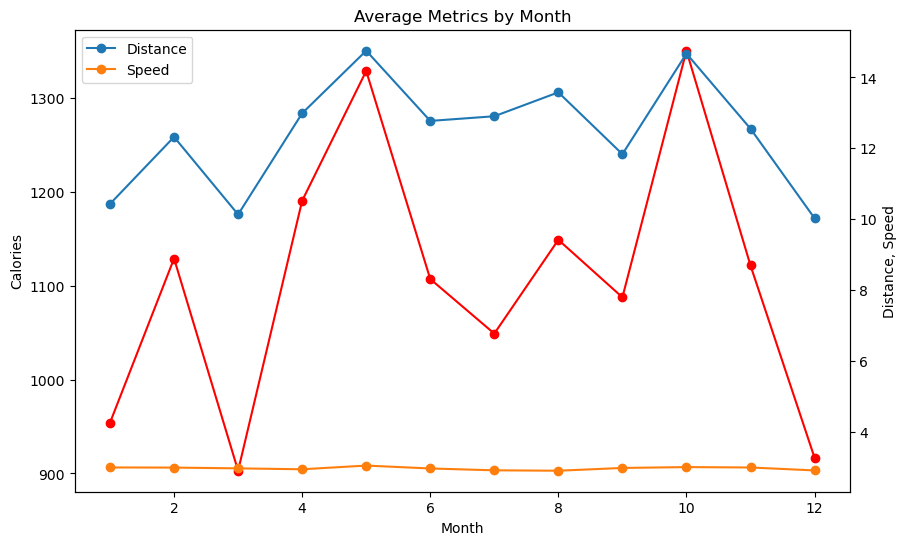

In [15]:
# Average Metrics by Month with Speed and Distance on the Right Axis
plt.figure(figsize=(10, 6))
ax = avg_metrics_month['Calories'].plot(color='red', marker='o')
plt.ylabel('Calories')

# Twin axis for speed and distance
ax2 = ax.twinx()
avg_metrics_month[['Distance', 'Average Speed']].plot(ax=ax2, marker='o')

plt.title("Average Metrics by Month")
plt.xlabel("Month")
ax.set_ylabel('Calories')
ax2.set_ylabel('Distance, Speed')
plt.legend(['Distance', 'Speed'], loc='upper left')
plt.show()

In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the rmse function
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Split the dataset into features (X) and target variable (y)
X = df_run_clean[['Distance', 'Elevation Gain', 'Power Count']]
y = df_run_clean['Moving Time']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used for SVM regression
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE = rmse(y_test, y_pred)

print("Performance Metrics of SVR :")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")



Performance Metrics of SVR :
Mean Squared Error (MSE): 3136595.05
Mean Absolute Error (MAE): 1309.39
R-squared Score (R2): -0.06
Root Mean Squared Error (RMSE): 1771.04


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the rmse function
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Split the dataset into features (X) and target variable (y)
X = df_run_clean[['Distance', 'Elevation Gain', 'Power Count']]  # Features
y = df_run_clean['Moving Time']  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE = rmse(y_test, y_pred)

print("Performance Metrics of Linear Regession:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")


Performance Metrics of Linear Regession:
Mean Squared Error (MSE): 9924.47
Mean Absolute Error (MAE): 84.86
R-squared Score (R2): 1.00
Root Mean Squared Error (RMSE): 99.62


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed
rf_model.fit(X_train_scaled, y_train)

# Define the rmse function
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
RMSE = rmse(y_test, y_pred)

print("Random Forest Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared Score (R2): {r2_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")


Random Forest Performance Metrics:
Mean Squared Error (MSE): 18860.22
Mean Absolute Error (MAE): 93.68
R-squared Score (R2): 0.99
Root Mean Squared Error (RMSE): 99.62


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)  
gb_model.fit(X_train_scaled, y_train)

# Define the rmse function
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
RMSE = rmse(y_test, y_pred)

print("Gradient Boosting Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"R-squared Score (R2): {r2_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")


Gradient Boosting Performance Metrics:
Mean Squared Error (MSE): 24139.37
Mean Absolute Error (MAE): 110.03
R-squared Score (R2): 0.99
Root Mean Squared Error (RMSE): 99.62
